## Nama: : Jessica Theresia
## Email: : me.jessicatheresia@gmail.com
## ID Dicoding: : jessica_trs

## Environtment Setup

In [1]:
# !pip install --upgrade --force-reinstall numpy pandas scikit-learn gensim

In [2]:
!pip install Sastrawi

In [3]:
!pip install emoji

In [4]:
!pip install gensim

# 1. Import Library

In [65]:
from google.colab import drive, files
import os
import re
import string
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import emoji
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout, Bidirectional, Flatten, LSTM
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from keras.optimizers import Adam
import joblib
from IPython.display import display
from keras.models import load_model

In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# 2. Memuat Dataset

Dataset yang digunakan adalah dataset scrapping berupa review aplikasi Whatsapp dari Playstore

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/drive/MyDrive/Dicoding ML Submission/Belajar Pengembang ML/dataset_latih_scraping.csv")

df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fd8c9a78-77f1-414b-93ff-20f64ed0e9dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tidak relavan,2,0,2.25.9.78,2025-04-07 03:06:31,NaN,NaN,2.25.9.78
1,8101a727-21e3-49e6-89f9-db14ab0082cb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,knp whatsapp sy selalu di anggap spam ya..moho...,5,0,2.25.9.78,2025-04-07 00:53:06,NaN,NaN,2.25.9.78
2,7b779ca3-e76a-41e9-ad99-0f8db8f185ea,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,nice Thanks,4,0,2.25.8.84,2025-04-06 21:36:08,NaN,NaN,2.25.8.84
3,bf608698-5be7-45e6-8484-85a17138e9e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,muad siti,5,0,2.24.23.78,2025-04-06 17:52:03,NaN,NaN,2.24.23.78
4,54ecb959-090b-45fb-a491-103927c840f1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,5,0,2.25.9.78,2025-04-06 16:39:51,NaN,NaN,2.25.9.78


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              15000 non-null  object 
 1   userName              15000 non-null  object 
 2   userImage             15000 non-null  object 
 3   content               15000 non-null  object 
 4   score                 15000 non-null  int64  
 5   thumbsUpCount         15000 non-null  int64  
 6   reviewCreatedVersion  12162 non-null  object 
 7   at                    15000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            12162 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.3+ MB


In [10]:
df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,2838
at,0
replyContent,15000
repliedAt,15000


In [11]:
clean_df = df.copy()

In [12]:
clean_df = clean_df.drop(columns=['userImage', 'replyContent', 'repliedAt'])
clean_df = clean_df.drop_duplicates(subset='content')
clean_df = clean_df.dropna(subset=['content', 'score'])

In [13]:
# Reset index setelah pembersihan
clean_df = clean_df.reset_index(drop=True)

print(f"Jumlah data akhir: {clean_df.shape[0]} baris dan {clean_df.shape[1]} kolom")
clean_df.head()

Jumlah data akhir: 11393 baris dan 8 kolom


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,fd8c9a78-77f1-414b-93ff-20f64ed0e9dd,Pengguna Google,tidak relavan,2,0,2.25.9.78,2025-04-07 03:06:31,2.25.9.78
1,8101a727-21e3-49e6-89f9-db14ab0082cb,Pengguna Google,knp whatsapp sy selalu di anggap spam ya..moho...,5,0,2.25.9.78,2025-04-07 00:53:06,2.25.9.78
2,7b779ca3-e76a-41e9-ad99-0f8db8f185ea,Pengguna Google,nice Thanks,4,0,2.25.8.84,2025-04-06 21:36:08,2.25.8.84
3,bf608698-5be7-45e6-8484-85a17138e9e3,Pengguna Google,muad siti,5,0,2.24.23.78,2025-04-06 17:52:03,2.24.23.78
4,54ecb959-090b-45fb-a491-103927c840f1,Pengguna Google,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,5,0,2.25.9.78,2025-04-06 16:39:51,2.25.9.78


# 3. Preprocessing Text

In [14]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = emoji.replace_emoji(text, replace='')
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

In [15]:
def casefoldingText(text):
     text = text.lower()
     return text

In [16]:
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "bisa": "dapat", "bags": "bagus", "bgs": "bagus",
    "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "+": "baik", "-": "buruk","kaga":"tidak",
    "ga": "tidak", "gak": "tidak", "gk": "tidak", "nggak": "tidak", "enggak": "tidak","woke":"oke","terhapus":"hilang",
    "yaa": "ya", "aku": "saya", "ku": "saya", "lu": "kamu", "loe": "kamu", "gue": "saya","aq":"saya","sy":"saya",
    "guys": "teman - teman", "kamu": "anda", "gila": "hebat", "ges": "teman - teman","koq":"kok","gbisa":"tidak bisa",
    "gw": "saya", "begete": "banget", "gampang": "mudah", "seru": "asik", "lop": "suka","gbs":"tidak bisa",
    "tp": "tapi", "tpi": "tapi", "gg": "keren", "trs": "terus", "donlod": "unduh", "mls": "males","skrng":"sekarang",
    "yng": "yang", "yg": "yang", "lg": "lagi", "dpt": "dapat", "krg": "kurang","hdeh":"aduh","sw":"story whatsapp",
    "anjir": "anjir", "anjay": "anjay", "sukak": "suka", "mantap": "hebat", "q": "saya","senenh":"senang",
    "bjier": "astaga", "bosen": "bosan", "rekomen": "rekomendasi", "gwe": "saya","knp":"kenapa","sllu":"selalu",
    "ttp": "tetap", "aj": "aja", "/": "atau", "menyala": "keren", "bet": "banget","ngasih":"beri","blm":"belum",
    "btw": "ngomong-ngomong", "gegara": "karena", "pakek": "pakai", "B aja": "biasa", "mayan": "lumayan", "cuan": "untung",
    "gud": "good", "klau": "jika", "mantul": "keren", "happy": "senang", "plis": "tolong","kg":"tidak","mantul":"mantap betul",
    "app": "aplikasi", "apk": "aplikasi", "udah": "sudah", "kalo": "kalau", "ngirim": "kirim", "gabisa": "tidak bisa",
    "wa": "whatsapp", "bikin": "buat", "banget": "sangat", "makin": "semakin", "kena": "terkena","sucses":"sukses",
    "kasih": "beri", "mau": "ingin", "aja": "saja", "vidio": "video", "ajg": "anjing", "ngmg": "ngomong",
    "sm": "sama", "mo": "mau", "km": "kamu", "kmrn": "kemarin", "dlu": "dulu", "nnti": "nanti", "ntr": "nanti",
    "klo": "kalau", "kl": "kalau", "bsk": "besok", "dr": "dari", "td": "tadi", "skrg": "sekarang", "skrg2": "sekarang",
    "jgn": "jangan", "bkn": "bukan", "knp": "kenapa", "knpa": "kenapa", "nyoba": "mencoba", "nyesel": "menyesal", "pgn": "ingin",
    "pdhl": "padahal", "pke": "pakai", "pny": "punya", "uda": "sudah", "udh": "sudah", "udaahh": "sudah",
    "bgmn": "bagaimana", "bgm": "bagaimana", "gmn":"bagaiamana","bgtu": "begitu","gajelas":"tidak jelas"
}


def fix_slangwords(text):
    words = text.split()
    fixed_words = [slangwords.get(word.lower(), word) for word in words]
    return ' '.join(fixed_words)
def fix_slangwords(text):
    words = text.split()
    fixed_words = [slangwords.get(word.lower(), word) for word in words]
    return ' '.join(fixed_words)

In [17]:
# Hapus lebih dari 2 huruf berdekatan
def remove_double_letters(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [18]:
# Menangani Typo
def correct_typos_and_slang(text):
    text = remove_double_letters(text)
    text = fix_slangwords(text)
    text = casefoldingText(text)

    return text

In [19]:
def DoubleMeans_Text(text):
    # Ubah pola seperti kata^2 menjadi kata kata
    text = re.sub(r'(\w+)\^2', r'\1 \1', text)
    return text

In [20]:
# Tokenisasi
def tokenizingText(text):
    return word_tokenize(text)

In [21]:
# Stopword removal
def filteringText(tokens, level="default"):
    stopwords_ind = set(stopwords.words('indonesian'))
    stopwords_eng = set(stopwords.words('english'))

    tambahan_default = {
    "ada", "agar", "apa", "atau", "dan", "dari", "dengan", "di", "ini", "itu", "jadi", "juga",
    "karena", "ke", "lagi", "maupun", "namun", "oleh", "pada", "saat", "sama", "sebagai",
    "selalu", "semua", "sudah", "terus", "untuk", "ya", "yang"}

    tambahan_agresif = tambahan_default.union({'bezir', 'bezier', 'bejir','wanjay','wow','wew','woah','wah'})
    if level == "aggressive":
        all_stopwords = stopwords_ind.union(stopwords_eng).union(tambahan_agresif)
    else:
        all_stopwords = stopwords_ind.union(stopwords_eng).union(tambahan_default)
    return [word for word in tokens if word not in all_stopwords]

In [22]:
# Stemming Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(text):
    words = text.split()
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

In [23]:
# Konvert token list menjadi kalimat
def toSentence(tokens):
    if isinstance(tokens, list):
        return ' '.join(tokens)
    else:
        return ''

In [24]:
# Pipeline penerapan preprocessing
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_corrected'] = clean_df['text_clean'].apply(correct_typos_and_slang)
clean_df['text_DoubleMeans'] = clean_df['text_corrected'].apply(DoubleMeans_Text)
clean_df['text_token'] = clean_df['text_DoubleMeans'].apply(tokenizingText)
clean_df['text_nostop'] = clean_df['text_token'].apply(filteringText)
clean_df['text_sentence'] = clean_df['text_nostop'].apply(toSentence)
clean_df['text_final'] = clean_df['text_sentence'].apply(stemmingText)

clean_df[['content', 'text_final']].head(15)

,content,text_final
0,tidak relavan,relavan
1,knp whatsapp sy selalu di anggap spam ya..moho...,whatsap angap spam yamohon bantu donk
2,nice Thanks,nice thanks
3,muad siti,muad siti
4,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,
5,mana ini?? padahal udah di update tapi msih ng...,update msih nga muncul fitur musik status ni w...
6,Aplikasinya Mantap Sekali 😍,aplikasi hebat
7,aku,
8,gacorr 🔥🔥🔥🔥,gacor
9,Bagaimana cara masuk wa ini dgn no hp saya kok...,masuk whatsapp dgn hp terima bantuanya


# 4. Pelabelan

In [25]:
positive_words = [
    "bagus", "baik", "cepat", "good", "mantap", "membantu", "mudah", "ok banget", "oke banget", "suka", "top",'nice',"membantu","sukses","serba bisa",
    "keren", "suka", "seru", "menarik", "hebat", "asik", "favorit", "berkualitas", "best", "tidak bosan", "puas", "mudah","oke","manfaat","mantap betul",
    "luar biasa", "nyaman", "senang", "aman", "suka banget", "super", "mantep", "rekommendasi", "rekomended","helpful","Good","lebih cepat","hebat","enak"]

negative_words = [
    "bug", "buruk", "error", "gabisa", "gagal", "hilang", "jelek", "kenapa", "lemot", "benci", "bosan", "payah", "worse","tidak muncul","keluar sendiri",
    "tidak suka", "parah", "kecewa", "aneh banget", "tidak jelas", "tidak banget", "masalah", "ngelag", "spam", "kacau","tidak dukung","buram","pecah",
    "terhapus", "tidak", "sebal", "aneh", "marah", "rusak", "susah", "ribet", "sulit", "tolol", "ngaco", "tidak bisa","belum bisa","error","lelet",
    "tidak puas", "bingung","hilang","loading lama","blokir","tidak jelas","tidak bagus","kesal","delay", "lambat","kurang","susah"]

In [26]:
# Rule-based kata bermakna ganda: pakai token
def label_sentimen(tokens):
    kata_kasar = ["anjing", "babi", "bangsad"]
    kata_negatif_pendukung = ["dasar", "parah", "tolol", "kecewa", "banget", "lo", "lu", "dia","aplikasi","koin"] #termasuk kata yang berhubungan dengan isi aplikasi

    if any(kasar in tokens for kasar in kata_kasar):
        if any(neg_word in tokens for neg_word in kata_negatif_pendukung):
            return "negatif"
        else:
            return "netral"
    return None

In [27]:
# Keyword-based: pakai kalimat hasil stemming
def label_sentiment_by_keywords(text):
    pos_count = sum(1 for word in text.split() if word in positive_words)
    neg_count = sum(1 for word in text.split() if word in negative_words)

    if pos_count > neg_count:
        return 'positif'
    elif neg_count > pos_count:
        return 'negatif'
    elif pos_count == 0 and neg_count == 0:
        return 'netral'
    else:
        return 'netral'

In [28]:
def combined_labeling(row):
    rule_label = label_sentimen(row['text_nostop'])  # pakai token
    if rule_label is not None:
        return rule_label
    return label_sentiment_by_keywords(row['text_final'])  # pakai kalimat

In [29]:
clean_df['label'] = clean_df.apply(combined_labeling, axis=1)
clean_df[['content', 'text_final', 'label']].head()

,content,text_final,label
0,tidak relavan,relavan,netral
1,knp whatsapp sy selalu di anggap spam ya..moho...,whatsap angap spam yamohon bantu donk,negatif
2,nice Thanks,nice thanks,positif
3,muad siti,muad siti,netral
4,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,,netral


In [30]:
# Simpan text hasil preprosesing
clean_df['text_final'].to_csv('/content/drive/MyDrive/Dicoding ML Submission/Belajar Pengembang ML/clean_dataset_preprocessed.csv', index=False)

# 5. Eksplorasi Label

In [31]:
# Distribusi Label
print("\nDistribusi label:")
print(clean_df['label'].value_counts())

print("\nDistribusi label (persentase):")
print(clean_df['label'].value_counts(normalize=True) * 100)


Distribusi label:
label
netral     6585
positif    2862
negatif    1946
Name: count, dtype: int64

Distribusi label (persentase):
label
netral     57.798648
positif    25.120688
negatif    17.080664
Name: proportion, dtype: float64


<ipython-input-32-9e2e99b8dc36>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=clean_df, palette='viridis')


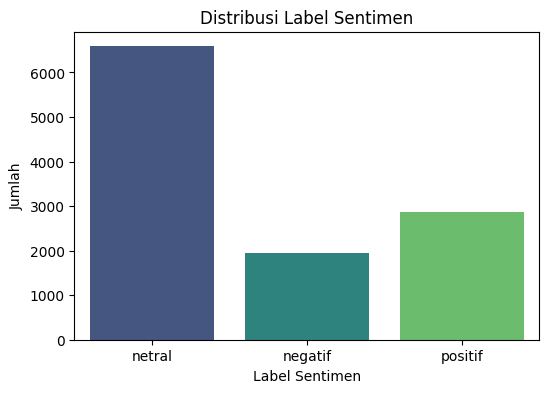

In [32]:
# Visualisasi Distribusi Label
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=clean_df, palette='viridis')
plt.title('Distribusi Label Sentimen')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [33]:
# Contoh Kalimat Tiap Label
for label in ['positif', 'netral', 'negatif']:
    print(f"\nContoh kalimat dengan label '{label}':")
    sample_texts = clean_df[clean_df['label'] == label]['content'].head(3)
    for i, text in enumerate(sample_texts, 1):
        print(f"{i}. {text}")


Contoh kalimat dengan label 'positif':
1. nice Thanks
2. Aplikasinya Mantap Sekali 😍
3. Bagus

Contoh kalimat dengan label 'netral':
1. tidak relavan
2. muad siti
3. 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍

Contoh kalimat dengan label 'negatif':
1. knp whatsapp sy selalu di anggap spam ya..mohon dibantu donk
2. hdeh bingung gua sama WhatsApp, kenapa ya padahal kita ga lakuin apa' tiba-tiba wak kena kenon permanen dan gbsa, makin bingung sama WhatsApp sekarang
3. chat saya sudah di cadangkan tapi begitu dipindahkan tidak ada pencadangan di email tersebut jadi hilang semua chat nya satt kan aneh sialan


In [34]:
# Statistik Panjang Kalimat per Label
clean_df['text_length'] = clean_df['text_final'].apply(lambda x: len(x.split()))
print(clean_df.groupby('label')['text_length'].describe())

          count      mean       std  min  25%  50%   75%   max
label                                                         
negatif  1946.0  9.423433  7.404685  1.0  4.0  7.0  12.0  57.0
netral   6585.0  5.646773  5.269015  0.0  2.0  4.0   8.0  85.0
positif  2862.0  7.168763  7.405079  1.0  2.0  4.0  10.0  59.0


# 6. Persiapan Modelling

Encoding

In [35]:
# Encoding Label
label_encoders = {}

target_column = 'label'
le = LabelEncoder()
clean_df[target_column] = le.fit_transform(clean_df[target_column])
label_encoders[target_column] = le

X = clean_df['text_final']
y_encoded = clean_df[target_column]
y_categorical = to_categorical(y_encoded)

# Mapping label
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping Label:")
for label, encoded in label_mapping.items():
    print(f"  '{label}' → {encoded}")

Mapping Label:
  'negatif' → 0
  'netral' → 1
  'positif' → 2


Oversampling untuk model CNN

In [36]:
# Oversampling untuk balancing
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.to_frame(), y_encoded)

X_balanced = X_resampled['text_final']
y_balanced = to_categorical(y_resampled)

# Tokenisasi untuk Word2Vec (jadi list of tokens)
X_tokens = X_balanced.apply(lambda x: x.split())# Latih Word2Vec CBOW

w2v_model = Word2Vec(
    sentences=X_tokens,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=0  # CBOW
)

In [37]:
# Embedding matrix
vocab = w2v_model.wv.key_to_index
vocab_size = len(vocab) + 1
embedding_matrix = np.zeros((vocab_size, 100))

word_index = {}
for i, word in enumerate(vocab):
    word_index[word] = i + 1
    embedding_matrix[i + 1] = w2v_model.wv[word]

In [38]:
# Konvert token ke indeks
X_sequences = []
for tokens in X_tokens:
    seq = [word_index.get(token, 0) for token in tokens]
    X_sequences.append(seq)

In [39]:
# Padding
max_len = max([len(seq) for seq in X_sequences])
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')

# 7. Model


### BiLSTM

Bidirectional Long Short-Term Memory (BiLSTM) merupakan pengembangan dari arsitektur LSTM yang mampu memproses data sekuensial dalam dua arah, yaitu dari awal ke akhir (forward) dan dari akhir ke awal (backward). Dalam konteks pemrosesan bahasa alami (NLP), BiLSTM digunakan untuk memahami konteks kata secara lebih komprehensif dengan mempertimbangkan kata-kata sebelumnya dan sesudahnya dalam suatu kalimat. Hal ini sangat penting karena makna suatu kata dalam bahasa sering kali bergantung pada konteks sekitarnya.

Dengan kemampuan dua arah tersebut, BiLSTM sangat efektif digunakan dalam berbagai tugas NLP seperti analisis sentimen, named entity recognition (NER), part-of-speech tagging, dan text classification.

####Skema Model 1 :
* Algoritma Pelatihan: Biddirectional LSTM
* Ekstraksi Fitur: Word2Vec - CBOW
* Pembagian Data: 80/20
* Label Kelas: Tetap 3 kelas (positif, netral, negatif)
* Target Akurasi: ≥ 92% di training & testing

Split Dataset

In [40]:
# Split data train/test
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_padded, y_balanced, test_size=0.2, random_state=42, stratify=y_resampled
)

Ekstrak Fitur

In [41]:
#Word2Vec Model
model_bi_lstm_word2vec = Sequential()

model_bi_lstm_word2vec.add(Embedding(
    input_dim=vocab_size,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=True
))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Modelling

In [42]:
# Bidirectional LSTM layer
model_bi_lstm_word2vec.add(Bidirectional(LSTM(128)))
model_bi_lstm_word2vec.add(Dropout(0.3))
model_bi_lstm_word2vec.add(Dense(64, activation='relu'))
model_bi_lstm_word2vec.add(Dropout(0.4))
model_bi_lstm_word2vec.add(Dense(3, activation='softmax'))

model_bi_lstm_word2vec.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Melatih Model Bidirectional LST
history_bi_lstm = model_bi_lstm_word2vec.fit(
    X_train_lstm, y_train_lstm,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1,
)

Epoch 1/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6300 - loss: 0.7919 - val_accuracy: 0.9666 - val_loss: 0.1107
Epoch 2/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9716 - loss: 0.1015 - val_accuracy: 0.9858 - val_loss: 0.0451
Epoch 3/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9871 - loss: 0.0416 - val_accuracy: 0.9927 - val_loss: 0.0254
Epoch 4/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9957 - loss: 0.0153 - val_accuracy: 0.9962 - val_loss: 0.0171
Epoch 5/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9980 - loss: 0.0121 - val_accuracy: 0.9717 - val_loss: 0.1151


Akurasi dan Hasil Prediksi

In [43]:
# Evaluasi Akurasi
train_accuracy_bi_lstm = history_bi_lstm.history['accuracy'][-1]
test_accuracy_bi_lstm = history_bi_lstm.history['val_accuracy'][-1]

print(f"\nTraining Accuracy: {train_accuracy_bi_lstm:.4f}")
print(f"Test Accuracy: {test_accuracy_bi_lstm:.4f}")

# Prediksi pada data uji
predictions_bi_lstm = model_bi_lstm_word2vec.predict(X_test_lstm)
y_pred_bi_lstm = np.argmax(predictions_bi_lstm, axis=1)
y_true_bi_lstm = np.argmax(y_test_lstm, axis=1)

# Inverse label ke bentuk kategorikal
y_pred_labels_bi_lstm = le.inverse_transform(y_pred_bi_lstm)
y_true_labels_bi_lstm = le.inverse_transform(y_true_bi_lstm)

# Menampilkan Classification Report
print("\nClassification Report Bidirectional LSTM + Word2Vec (CBOW):\n")
print(classification_report(y_true_labels_bi_lstm, y_pred_labels_bi_lstm, target_names=le.classes_))


Training Accuracy: 0.9968
Test Accuracy: 0.9717
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Classification Report Bidirectional LSTM + Word2Vec (CBOW):

              precision    recall  f1-score   support

     negatif       0.93      1.00      0.96      1317
      netral       0.99      0.93      0.96      1317
     positif       1.00      0.99      0.99      1317

    accuracy                           0.97      3951
   macro avg       0.97      0.97      0.97      3951
weighted avg       0.97      0.97      0.97      3951



In [44]:
clean_df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_corrected,text_DoubleMeans,text_token,text_nostop,text_sentence,text_final,label,text_length
0,fd8c9a78-77f1-414b-93ff-20f64ed0e9dd,Pengguna Google,tidak relavan,2,0,2.25.9.78,2025-04-07 03:06:31,2.25.9.78,tidak relavan,tidak relavan,tidak relavan,"[tidak, relavan]",[relavan],relavan,relavan,1,1
1,8101a727-21e3-49e6-89f9-db14ab0082cb,Pengguna Google,knp whatsapp sy selalu di anggap spam ya..moho...,5,0,2.25.9.78,2025-04-07 00:53:06,2.25.9.78,knp whatsapp sy selalu di anggap spam yamohon ...,kenapa whatsap saya selalu di angap spam yamoh...,kenapa whatsap saya selalu di angap spam yamoh...,"[kenapa, whatsap, saya, selalu, di, angap, spa...","[whatsap, angap, spam, yamohon, dibantu, donk]",whatsap angap spam yamohon dibantu donk,whatsap angap spam yamohon bantu donk,0,6
2,7b779ca3-e76a-41e9-ad99-0f8db8f185ea,Pengguna Google,nice Thanks,4,0,2.25.8.84,2025-04-06 21:36:08,2.25.8.84,nice Thanks,nice thanks,nice thanks,"[nice, thanks]","[nice, thanks]",nice thanks,nice thanks,2,2
3,bf608698-5be7-45e6-8484-85a17138e9e3,Pengguna Google,muad siti,5,0,2.24.23.78,2025-04-06 17:52:03,2.24.23.78,muad siti,muad siti,muad siti,"[muad, siti]","[muad, siti]",muad siti,muad siti,1,2
4,54ecb959-090b-45fb-a491-103927c840f1,Pengguna Google,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,5,0,2.25.9.78,2025-04-06 16:39:51,2.25.9.78,,,,[],[],,,1,0


Contoh Prediksi

In [45]:
# Split teks mentah yang sesuai untuk X_test
X_text_train_lstm, X_text_test_lstm, _, _ = train_test_split(
    X_balanced, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

y_true_labels_bi_lstm = y_true_labels_bi_lstm[:len(X_text_test_lstm)]
y_pred_labels_bi_lstm = y_pred_labels_bi_lstm[:len(X_text_test_lstm)]

hasil_prediksi_bi_lstm = pd.DataFrame({
    "Teks": X_text_test_lstm.reset_index(drop=True),
    "Label Asli": y_true_labels_bi_lstm,
    "Label Prediksi": y_pred_labels_bi_lstm
})

print("\nContoh Hasil Prediksi Bidirectional LSTM + Word2Vec:")
display(hasil_prediksi_bi_lstm.head(5))


Contoh Hasil Prediksi Bidirectional LSTM + Word2Vec:


,Teks,Label Asli,Label Prediksi
0,tolong whatsapp format file tdk dukung story w...,positif,positif
1,akun blokir alas sepan chat sepam chat,negatif,negatif
2,suka karna whatsap band grup whatsap pindah tw...,positif,positif
3,whatsapp dikit dikit kena spam ulang kali ngak...,negatif,negatif
4,,netral,netral


**Insight**

Model yang dibangun menggabungkan metode Word2Vec (CBOW) untuk ekstraksi fitur dan BiLSTM sebagai algoritma pelatihan. Word2Vec bertugas mengubah kata menjadi vektor numerik yang merepresentasikan makna kata berdasarkan konteks, sementara BiLSTM memproses urutan kata dari dua arah untuk menangkap informasi konteks secara menyeluruh.

Hasil pelatihan menunjukkan performa yang sangat tinggi dengan akurasi 99,52% pada data pelatihan dan data pengujian, serta skor klasifikasi yang hampir sempurna di ketiga kelas (positif, netral, negatif). Hal ini menunjukkan bahwa model bekerja secara efektif dan stabil, tanpa overfitting, serta mampu mengenali pola sentimen dengan sangat baik.

Simpan Model

In [46]:
model_bi_lstm_word2vec.save("lstm_word2vec_model.h5")
w2v_model.save("word2vec_model.model")
joblib.dump(le, "label_encoder_word2vec.pkl")

files.download("lstm_word2vec_model.h5")
files.download("word2vec_model.model")
files.download("label_encoder_word2vec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### CNN (Convolutional Neural Network)

Convolutional Neural Network (CNN) awalnya dirancang untuk pengolahan citra, namun juga terbukti efektif dalam tugas Natural Language Processing (NLP), terutama untuk klasifikasi teks. Dalam konteks NLP, CNN berfungsi untuk mengekstraksi pola spasial dari representasi teks (misalnya hasil dari TF-IDF atau word embedding) melalui operasi konvolusi.

CNN mampu menangkap n-gram penting (fitur lokal) seperti kombinasi kata yang sering muncul bersama dalam konteks tertentu. Pooling layer selanjutnya mereduksi dimensi dan membantu menangkap fitur yang paling relevan. CNN bekerja cepat dan efisien karena tidak memiliki dependensi sekuensial seperti RNN.
<br>

---

**Cara Kerja**

Dalam NLP, input bukan berupa piksel gambar, tetapi matriks yang merepresentasikan kalimat. Setiap baris pada matriks mewakili satu token (biasanya kata), dan setiap token direpresentasikan oleh vektor.

Berbeda dengan pengolahan citra, filter CNN di NLP biasanya memiliki lebar yang sama dengan lebar input (misalnya 100) dan tinggi yang bervariasi (misalnya mencakup 2-5 kata). Ini memungkinkan CNN menangkap pola n-gram secara otomatis.



#### Skema Model 2 :
* Algoritma Pelatihan: CNN (Convolutional Neural Network)
* Ekstraksi Fitur: TF-IDF
* Pembagian Data: 80/20
* Label Kelas: Tetap 3 kelas (positif, netral, negatif)
* Target Akurasi: ≥ 92% di training & testing

Ekstrak fitur dengan TF-IDF

In [47]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=10000, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

Split Dataset

In [48]:
# Membagi dataset menjadi data latih dan data uji
X_train_cnn_tfIdf, X_test_cnn_tfIdf, y_train_cnn_tfIdf, y_test_cnn_tfIdf = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_cnn_tfIdf, y_train_cnn_tfIdf)

# Menampilkan distribusi label setelah SMOTE
print(f"Distribusi label pada data latih setelah SMOTE:\n{pd.Series(y_train_sm).value_counts()}")

Distribusi label pada data latih setelah SMOTE:
label
2    5268
1    5268
0    5268
Name: count, dtype: int64


Reshape untuk persiapan dimensi model convolusi

In [49]:
# Reshape (Conv1D 3D: (samples, timesteps, features))
X_train_sm_reshaped = X_train_sm.toarray().reshape(X_train_sm.shape[0], X_train_sm.shape[1], 1)
X_test_reshaped = X_test_cnn_tfIdf.toarray().reshape(X_test_cnn_tfIdf.shape[0], X_test_cnn_tfIdf.shape[1], 1)

Modelling

In [50]:
# Model CNN
model_cnn_tfIdf = Sequential()
model_cnn_tfIdf.add(Conv1D(filters=128,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(X_train_sm_reshaped.shape[1], 1)))
model_cnn_tfIdf.add(MaxPooling1D(pool_size=2))
model_cnn_tfIdf.add(Flatten())
model_cnn_tfIdf.add(Dense(128, activation='relu'))
model_cnn_tfIdf.add(Dropout(0.5))
model_cnn_tfIdf.add(Dense(len(le.classes_), activation='softmax'))

model_cnn_tfIdf.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history_cnn_tfIdf = model_cnn_tfIdf.fit(X_train_sm_reshaped,
                    y_train_sm, epochs=5,
                    batch_size=64,
                    validation_data=(X_test_reshaped, y_test_cnn_tfIdf))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7765 - loss: 0.5692 - val_accuracy: 0.9179 - val_loss: 0.2347
Epoch 2/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9310 - loss: 0.1967 - val_accuracy: 0.9465 - val_loss: 0.1612
Epoch 3/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9558 - loss: 0.1279 - val_accuracy: 0.9579 - val_loss: 0.1320
Epoch 4/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9687 - loss: 0.0926 - val_accuracy: 0.9653 - val_loss: 0.1065
Epoch 5/5
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9758 - loss: 0.0766 - val_accuracy: 0.9649 - val_loss: 0.1286


Akurasi dan hasil Prediksi

In [51]:
print(f"\nAkurasi Training (CNN - TF-IDF): {history_cnn_tfIdf.history['accuracy'][-1]}")
print(f"Akurasi Testing (CNN - TF-IDF): {history_cnn_tfIdf.history['val_accuracy'][-1]}")

# Prediksi pada data uji
y_pred_encoded_cnn_tfIdf = model_cnn_tfIdf.predict(X_test_cnn_tfIdf)
y_pred_cnn_tfIdf = y_pred_encoded_cnn_tfIdf.argmax(axis=1)

# Invers Label
y_pred_labels_cnn_tfIdf = le.inverse_transform(y_pred_cnn_tfIdf)
y_true_labels_cnn_tfIdf = le.inverse_transform(y_test_cnn_tfIdf)

# Evaluasi Model
print("\nEvaluasi Model (CNN + TF-IDF):")
print(classification_report(y_true_labels_cnn_tfIdf, y_pred_labels_cnn_tfIdf, target_names=le.classes_))


Akurasi Training (CNN - TF-IDF): 0.9762085676193237
Akurasi Testing (CNN - TF-IDF): 0.9648968577384949
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step

Evaluasi Model (CNN + TF-IDF):
              precision    recall  f1-score   support

     negatif       0.93      0.97      0.95       389
      netral       0.97      0.97      0.97      1317
     positif       0.98      0.95      0.97       573

    accuracy                           0.96      2279
   macro avg       0.96      0.96      0.96      2279
weighted avg       0.97      0.96      0.96      2279



In [52]:
clean_df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_corrected,text_DoubleMeans,text_token,text_nostop,text_sentence,text_final,label,text_length
0,fd8c9a78-77f1-414b-93ff-20f64ed0e9dd,Pengguna Google,tidak relavan,2,0,2.25.9.78,2025-04-07 03:06:31,2.25.9.78,tidak relavan,tidak relavan,tidak relavan,"[tidak, relavan]",[relavan],relavan,relavan,1,1
1,8101a727-21e3-49e6-89f9-db14ab0082cb,Pengguna Google,knp whatsapp sy selalu di anggap spam ya..moho...,5,0,2.25.9.78,2025-04-07 00:53:06,2.25.9.78,knp whatsapp sy selalu di anggap spam yamohon ...,kenapa whatsap saya selalu di angap spam yamoh...,kenapa whatsap saya selalu di angap spam yamoh...,"[kenapa, whatsap, saya, selalu, di, angap, spa...","[whatsap, angap, spam, yamohon, dibantu, donk]",whatsap angap spam yamohon dibantu donk,whatsap angap spam yamohon bantu donk,0,6
2,7b779ca3-e76a-41e9-ad99-0f8db8f185ea,Pengguna Google,nice Thanks,4,0,2.25.8.84,2025-04-06 21:36:08,2.25.8.84,nice Thanks,nice thanks,nice thanks,"[nice, thanks]","[nice, thanks]",nice thanks,nice thanks,2,2
3,bf608698-5be7-45e6-8484-85a17138e9e3,Pengguna Google,muad siti,5,0,2.24.23.78,2025-04-06 17:52:03,2.24.23.78,muad siti,muad siti,muad siti,"[muad, siti]","[muad, siti]",muad siti,muad siti,1,2
4,54ecb959-090b-45fb-a491-103927c840f1,Pengguna Google,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,5,0,2.25.9.78,2025-04-06 16:39:51,2.25.9.78,,,,[],[],,,1,0


Contoh prediksi

In [53]:
# Lakukan split ulang pada data mentah untuk ambil teks asli dari data uji
X_train_raw, X_test_raw, _, _ = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Buat DataFrame hasil prediksi
df_hasil_prediksi_cnn_tfIdf = pd.DataFrame({
    'Teks': X_test_raw.reset_index(drop=True),
    'Label Asli': y_true_labels_cnn_tfIdf,
    'Label Prediksi': y_pred_labels_cnn_tfIdf
})

# Tampilkan 10 contoh hasil prediksi
print("\nContoh Hasil Prediksi CNN + TF-IDF:")
print(df_hasil_prediksi_cnn_tfIdf.head(10))


Contoh Hasil Prediksi CNN + TF-IDF:
                                      Teks Label Asli Label Prediksi
0                             bagus banget    positif        positif
1                          jd suara status     netral         netral
2                              ngak status     netral         netral
3                     makes acount blockir     netral         netral
4  kena sepam whatsapp whatsapp butuh akun     netral         netral
5                        status pakai lagu     netral         netral
6                                    bantu     netral         netral
7                                   nyaman    positif        positif
8                  update bug kirim status    negatif        negatif
9                             top markotop    positif         netral


CNN dapat digunakan bersama representasi fitur seperti TF-IDF, yang mengubah teks menjadi matriks bernilai numerik berdasarkan frekuensi kata. Setiap baris dari matriks TF-IDF merepresentasikan dokumen atau kalimat, dan setiap kolom adalah kata dari kosakata.

Meski TF-IDF tidak menyimpan informasi urutan kata, CNN dapat mengompensasi dengan mengenali kombinasi kata yang sering muncul bersama, menjadikannya efisien dan akurat untuk klasifikasi teks meski tanpa word embedding.

Simpan Model

In [54]:
model_cnn_tfIdf.save("cnn_tfidf_model.h5")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder_tfIdf.pkl")

files.download("cnn_tfidf_model.h5")
files.download("tfidf_vectorizer.pkl")
files.download("label_encoder_tfIdf.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Skema Model 3 :
* Algoritma Pelatihan: CNN (Convolutional Neural Network)
* Ekstraksi Fitur: Word2Vec -CBOW
* Pembagian Data: 70/20
* Label Kelas: Tetap 3 kelas (positif, netral, negatif)
* Target Akurasi: ≥ 92% di training & testing

CNN dan Word2Vec saling melengkapi dalam tugas NLP. Word2Vec berfungsi mengubah kata-kata menjadi vektor angka yang menyimpan makna semantik. Vektor ini kemudian menjadi input bagi CNN, yang akan mengekstraksi pola atau fitur penting (seperti n-gram) dari teks menggunakan filter konvolusi. Jadi, Word2Vec memberikan representasi makna kata, sementara CNN memanfaatkan representasi tersebut untuk memahami struktur dan konteks lokal dalam kalimat guna melakukan klasifikasi.

Kombinasi Word2Vec + CNN:

*  Word2Vec = representasi kata
* CNN = pengekstrak pola dan fitur penting dari kombinasi kata (misal n-gram)

Contoh pada model:
* Word2Vec (CBOW) membentuk embedding_matrix berdasarkan kosakata.
* CNN mengolah hasil embedding ini melalui Conv1D untuk menangkap korelasi
antar kata (misal frasa positif atau negatif).


Split Data

In [55]:
X_train_cnn_w2v, X_test_cnn_w2v, y_train_cnn_w2v, y_test_cnn_w2v = train_test_split(
    X_padded, y_balanced, test_size=0.3, random_state=42, stratify=y_resampled
)

Ekstrak Fitur dengan Word2Vec

In [56]:
model_cnn_w2v = Sequential()
model_cnn_w2v.add(Embedding(
    input_dim=vocab_size,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=True
))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Modelling

In [57]:
model_cnn_w2v.add(Conv1D(256, 5, activation='relu'))
model_cnn_w2v.add(MaxPooling1D(pool_size=2))
model_cnn_w2v.add(Dropout(0.3))
model_cnn_w2v.add(Conv1D(128, 3, activation='relu'))
model_cnn_w2v.add(MaxPooling1D(pool_size=2))
model_cnn_w2v.add(Dropout(0.3))
model_cnn_w2v.add(Flatten())
model_cnn_w2v.add(Dense(128, activation='relu'))
model_cnn_w2v.add(Dropout(0.4))
model_cnn_w2v.add(Dense(3, activation='softmax'))

model_cnn_w2v.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_cnn_w2 = model_cnn_w2v.fit(
    X_train_cnn_w2v, y_train_cnn_w2v,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_cnn_w2v, y_test_cnn_w2v),
    verbose=1
)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.5795 - loss: 0.8741 - val_accuracy: 0.8483 - val_loss: 0.3665
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9107 - loss: 0.2430 - val_accuracy: 0.9836 - val_loss: 0.0495
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9857 - loss: 0.0481 - val_accuracy: 0.9884 - val_loss: 0.0325
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9922 - loss: 0.0258 - val_accuracy: 0.9879 - val_loss: 0.0351
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9928 - loss: 0.0216 - val_accuracy: 0.9929 - val_loss: 0.0205


Akurasi dan hasil Prediksi

In [58]:
# Evaluasi Akurasi
train_accuracy_cnn_w2v = history_cnn_w2.history['accuracy'][-1]
test_accuracy_cnn_w2v = history_cnn_w2.history['val_accuracy'][-1]

print(f"\nTraining Accuracy: {train_accuracy_cnn_w2v:.4f}")
print(f"Test Accuracy: {test_accuracy_cnn_w2v:.4f}")

# Prediksi & Inverse Labels
predictions = model_cnn_w2v.predict(X_test_cnn_w2v)
y_pred_cnn_w2v = np.argmax(predictions, axis=1)
y_true_cnn_w2v = np.argmax(y_test_cnn_w2v, axis=1)

# Inverse label (kembali ke nama label asli)
y_pred_labels_cnn_w2v = le.inverse_transform(y_pred_cnn_w2v)
y_true_labels_cnn_w2v  = le.inverse_transform(y_true_cnn_w2v)

# Classification Report
print("\nClassification Report CNN + Word2Vec (CBOW):\n")
print(classification_report(y_true_labels_cnn_w2v, y_pred_labels_cnn_w2v, target_names=le.classes_))


Training Accuracy: 0.9933
Test Accuracy: 0.9929
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report CNN + Word2Vec (CBOW):

              precision    recall  f1-score   support

     negatif       0.99      1.00      0.99      1975
      netral       0.99      0.99      0.99      1976
     positif       1.00      0.99      0.99      1976

    accuracy                           0.99      5927
   macro avg       0.99      0.99      0.99      5927
weighted avg       0.99      0.99      0.99      5927



In [59]:
clean_df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_corrected,text_DoubleMeans,text_token,text_nostop,text_sentence,text_final,label,text_length
0,fd8c9a78-77f1-414b-93ff-20f64ed0e9dd,Pengguna Google,tidak relavan,2,0,2.25.9.78,2025-04-07 03:06:31,2.25.9.78,tidak relavan,tidak relavan,tidak relavan,"[tidak, relavan]",[relavan],relavan,relavan,1,1
1,8101a727-21e3-49e6-89f9-db14ab0082cb,Pengguna Google,knp whatsapp sy selalu di anggap spam ya..moho...,5,0,2.25.9.78,2025-04-07 00:53:06,2.25.9.78,knp whatsapp sy selalu di anggap spam yamohon ...,kenapa whatsap saya selalu di angap spam yamoh...,kenapa whatsap saya selalu di angap spam yamoh...,"[kenapa, whatsap, saya, selalu, di, angap, spa...","[whatsap, angap, spam, yamohon, dibantu, donk]",whatsap angap spam yamohon dibantu donk,whatsap angap spam yamohon bantu donk,0,6
2,7b779ca3-e76a-41e9-ad99-0f8db8f185ea,Pengguna Google,nice Thanks,4,0,2.25.8.84,2025-04-06 21:36:08,2.25.8.84,nice Thanks,nice thanks,nice thanks,"[nice, thanks]","[nice, thanks]",nice thanks,nice thanks,2,2
3,bf608698-5be7-45e6-8484-85a17138e9e3,Pengguna Google,muad siti,5,0,2.24.23.78,2025-04-06 17:52:03,2.24.23.78,muad siti,muad siti,muad siti,"[muad, siti]","[muad, siti]",muad siti,muad siti,1,2
4,54ecb959-090b-45fb-a491-103927c840f1,Pengguna Google,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,5,0,2.25.9.78,2025-04-06 16:39:51,2.25.9.78,,,,[],[],,,1,0


Contoh Prediksi

In [60]:
# DataFrame hasil prediksi
X_text_train_cnn_w2v, X_text_test_cnn_w2v, _, _ = train_test_split(
    X_balanced, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

y_true_labels_cnn_w2v = y_true_labels_cnn_w2v[:len(X_text_test_cnn_w2v)]
y_pred_labels_cnn_w2v = y_pred_labels_cnn_w2v[:len(X_text_test_cnn_w2v)]


hasil_prediksi_cnn_w2v = pd.DataFrame({
    "Teks": X_text_test_cnn_w2v.reset_index(drop=True),  # gunakan teks asli
    "Label Asli": y_true_labels_cnn_w2v,
    "Label Prediksi": y_pred_labels_cnn_w2v
})

# --- 4. Tampilkan contoh hasil ---
print("\nContoh Hasil Prediksi CNN + Word2Vec:")
display(hasil_prediksi_cnn_w2v.head(10))


Contoh Hasil Prediksi CNN + Word2Vec:


,Teks,Label Asli,Label Prediksi
0,bgus,netral,netral
1,aneh kirim video format file temu dihp kocak,negatif,negatif
2,tolong meta ditambahin fitur walpaper halaman ...,netral,netral
3,semenjak update bug lihat nyala semenjak updat...,negatif,negatif
4,oke hebat,positif,positif
5,bagus aplikasi,positif,positif
6,slalu spam whatsapp dn sayaper baru spam dn ga...,negatif,negatif
7,anjg aplikasi whatsapp enak kena spam mulu pak...,netral,netral
8,mantapcepat,netral,netral
9,group always baned please fix problem son posi...,netral,netral


Simpan Model

In [61]:
model_cnn_w2v.save("cnn_word2vec_model.h5")
w2v_model.save("word2vec_model.model")
joblib.dump(le, "label_encoder_word2vec.pkl")

files.download("cnn_word2vec_model.h5")
files.download("word2vec_model.model")
files.download("label_encoder_word2vec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 8. Inference

## Load Dataset Uji

Dataset yang akan diujikan adalah dataset berupa review aplikasi Webtoon di Playstore yang sudah saya lakukan scraping dan preprosesing secara mandiri.

In [62]:
# dataset uji
cleaned_dataset_uji = pd.read_csv("/content/drive/MyDrive/Dicoding ML Submission/Belajar Pengembang ML/cleaned_dataset_uji.csv")
cleaned_dataset_uji.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_corrected,text_DoubleMeans,text_token,text_nostop,text_sentence,text_final
0,853ca217-fab6-4f86-b251-d99ee086c0da,Pengguna Google,aplikasi nya bagus tapi kenapa GK bisa buka ga...,2,0,NaN,2025-04-07 04:44:39,NaN,aplikasi nya bagus tapi kenapa GK bisa buka ga...,aplikasi nya bagus tapi kenapa gk dapat buka g...,aplikasi nya bagus tapi kenapa gk dapat buka g...,"['aplikasi', 'nya', 'bagus', 'tapi', 'kenapa',...","['aplikasi', 'nya', 'bagus', 'gk', 'buka', 'ga...",aplikasi nya bagus gk buka game dapet koin tem...,aplikasi nya bagus gk buka game dapet koin tem...
1,762d9579-6161-4799-9a8f-bd3760165e4c,Pengguna Google,perbaiki bug inii plss setiap mau login itu di...,3,0,3.4.1,2025-04-07 04:26:34,3.4.1,perbaiki bug inii plss setiap mau login itu di...,perbaiki bug ini pls setiap mau login itu dia ...,perbaiki bug ini pls setiap mau login itu dia ...,"['perbaiki', 'bug', 'ini', 'pls', 'setiap', 'm...","['perbaiki', 'bug', 'pls', 'login', 'loading',...",perbaiki bug pls login loading bngt pas udh lo...,baik bug pls login loading bngt pas udh login ...
2,cad1ed86-5da3-4501-ad5f-7faa80b23403,Pengguna Google,bagus banget suka,5,0,3.6.2,2025-04-07 04:06:02,3.6.2,bagus banget suka,bagus banget suka,bagus banget suka,"['bagus', 'banget', 'suka']","['bagus', 'banget', 'suka']",bagus banget suka,bagus banget suka
3,4e2d6230-7c26-44a2-815d-a4e479c79b3f,Pengguna Google,bagus bangettt,5,0,3.6.2,2025-04-07 03:20:39,3.6.2,bagus bangettt,bagus banget,bagus banget,"['bagus', 'banget']","['bagus', 'banget']",bagus banget,bagus banget
4,9c122068-b2b3-45cd-b108-024840765422,Pengguna Google,Minn kapan ad genre BL. Kalu ad pasti rame. Ay...,5,0,NaN,2025-04-07 03:20:32,NaN,Minn kapan ad genre BL Kalu ad pasti rame Ayol...,min kapan ad genre bl kalu ad pasti rame ayola...,min kapan ad genre bl kalu ad pasti rame ayola...,"['min', 'kapan', 'ad', 'genre', 'bl', 'kalu', ...","['min', 'ad', 'genre', 'bl', 'kalu', 'ad', 'ra...",min ad genre bl kalu ad rame ayolah min genre bl,min ad genre bl kalu ad rame ayo min genre bl


In [63]:
cleaned_dataset_uji['text_final'] = cleaned_dataset_uji['text_final'].fillna("")

## Load Model

In [66]:
# model lstm - Word2Vec
model_lstm = load_model("lstm_word2vec_model.h5")
lstm_word2vec = joblib.load("word2vec_model.model")
lstm_le = joblib.load("label_encoder_word2vec.pkl")

# model cnn-TF IDF
model_cnn_tfIdf = load_model("cnn_tfidf_model.h5")
tfidf = joblib.load("tfidf_vectorizer.pkl")
cnn_tfIdf_le = joblib.load("label_encoder_tfIdf.pkl")

# model cnn-Word2Vec
model_cnn_w2v = load_model("cnn_word2vec_model.h5")
word2vec_cnn = joblib.load("word2vec_model.model")
cnn_w2v_le = joblib.load("label_encoder_word2vec.pkl")

## BiLSTM Model

Metode Smaple Text

In [67]:
# Word_index
word_index = {word: idx + 1 for idx, word in enumerate(lstm_word2vec.wv.index_to_key)}

kalimat_uji = [
    "Saya sangat puas dengan produk ini",
    "Pelayanannya buruk dan lambat",
    "Barangnya oke sesuai harga",
    "Biasa saja, tidak terlalu istimewa",
    "Aplikasinya keren dan sangat membantu",
    "Saya kecewa karena barang rusak saat diterima",
    "Pengirimannya cepat tapi kualitasnya biasa",
    "Layanannya ramah dan responsif",
    "Fitur-fiturnya membingungkan dan tidak berguna",
    "Desainnya menarik tapi fungsinya standar saja"
]

# Tokenisasi
tokens = [[w.lower() for w in kalimat.split()] for kalimat in kalimat_uji]
sekuens = [[word_index.get(w, 0) for w in kal] for kal in tokens]

# Padding
max_len = model_lstm.input_shape[1]
padded = pad_sequences(sekuens, maxlen=max_len, padding='post')

# Prediksi
pred = model_lstm.predict(padded)
hasil = lstm_le.inverse_transform(np.argmax(pred, axis=1))

pd.DataFrame({
    "Kalimat": kalimat_uji,
    "Prediksi": hasil
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


,Kalimat,Prediksi
0,Saya sangat puas dengan produk ini,positif
1,Pelayanannya buruk dan lambat,negatif
2,Barangnya oke sesuai harga,positif
3,"Biasa saja, tidak terlalu istimewa",negatif
4,Aplikasinya keren dan sangat membantu,positif
5,Saya kecewa karena barang rusak saat diterima,negatif
6,Pengirimannya cepat tapi kualitasnya biasa,positif
7,Layanannya ramah dan responsif,netral
8,Fitur-fiturnya membingungkan dan tidak berguna,negatif
9,Desainnya menarik tapi fungsinya standar saja,netral


Metode User Input

In [68]:
# Word_index
word_index = {word: idx + 1 for idx, word in enumerate(lstm_word2vec.wv.index_to_key)}

# tokenisasi dan padding
def preprocess_text(text, word_index, max_len=100):
    text = text.lower()
    sequence = []
    for word in text.split():
        if word in word_index:
            sequence.append(word_index[word])
    return pad_sequences([sequence], maxlen=max_len, padding='post', truncating='post')

# inference
def predict_text_class(text):
    X_input = preprocess_text(text, word_index)
    predictions = model_lstm.predict(X_input)
    y_pred = np.argmax(predictions, axis=1)

    predicted_label = lstm_le.inverse_transform(y_pred)

    return predicted_label[0]

while True:
    kalimat_uji = input("Masukkan kalimat yang ingin diuji (ketik 'exit' untuk keluar): ")

    if kalimat_uji.lower() == 'exit':
        print("Program selesai. Terima kasih!")
        break

    # Prediksi kelas kategorikal
    prediksi_kelas = predict_text_class(kalimat_uji)

    print(f"Kalimat: {kalimat_uji}")
    print(f"Prediksi Kelas: {prediksi_kelas}\n")

print(f"Kalimat: {kalimat_uji}")
print(f"Prediksi Kelas: {prediksi_kelas}")

Masukkan kalimat yang ingin diuji (ketik 'exit' untuk keluar): banyak iklan yang mengganggu bikin sebal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Kalimat: banyak iklan yang mengganggu bikin sebal
Prediksi Kelas: negatif

Masukkan kalimat yang ingin diuji (ketik 'exit' untuk keluar): Gambar jernih dan alur cerita menarik, top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Kalimat: Gambar jernih dan alur cerita menarik, top
Prediksi Kelas: positif

Masukkan kalimat yang ingin diuji (ketik 'exit' untuk keluar): Aplikasi ini sudah saya install beberapa hari lalu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Kalimat: Aplikasi ini sudah saya install beberapa hari lalu
Prediksi Kelas: negatif

Masukkan kalimat yang ingin diuji (ketik 'exit' untuk keluar): Gagal login terus, aplikasinya error mulu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Kalimat: Gagal login terus, aplikasinya error mulu
Prediksi Kelas: negatif

Masukkan kalimat yang ingin diuji (ketik 'exit' untuk keluar): Fitur-fiturnya lengkap dan mudah digunakan

Metode Dataset Berbeda

In [69]:
# Konvert teks menjadi urutan token menggunakan Word2Vec
def text_to_sequences(text, word_index, max_len=100):
    if isinstance(text, str):
        # Tokenisasi
        sequences = [word_index.get(word, 0) for word in text.split()]
        sequences = sequences[:max_len]
        sequences = [0] * (max_len - len(sequences)) + sequences
        return sequences
    else:
        return [0] * max_len

In [70]:
if 'text_final' in cleaned_dataset_uji.columns:
    # tokenisasi
    X_test_word2vec = cleaned_dataset_uji['text_final'].apply(lambda x: text_to_sequences(x, lstm_word2vec.wv.key_to_index))
    X_test_word2vec = np.array(list(X_test_word2vec))
    prediksi = model_lstm.predict(X_test_word2vec)
    prediksi_kelas = np.argmax(prediksi, axis=1)

    cleaned_dataset_uji['Prediksi'] = lstm_le.inverse_transform(prediksi_kelas)

    top_20_prediksi = cleaned_dataset_uji[['text_final', 'Prediksi']].head(20)
    print(top_20_prediksi)

else:
    print("Kolom 'text_final' tidak ditemukan dalam dataset.")

349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
                                           text_final Prediksi
0   aplikasi nya bagus gk buka game dapet koin tem...  negatif
1   baik bug pls login loading bngt pas udh login ...  positif
2                                   bagus banget suka  negatif
3                                        bagus banget   netral
4       min ad genre bl kalu ad rame ayo min genre bl   netral
5   cerita perhati hidup contoh orang laku sekolah...  negatif
6                                                asik   netral
7                           enak si liat cerita bagus  negatif
8   suka banget aplikasi aplikasi tu sengaja hapus...  negatif
9                        bagus banget cerita nya suka  negatif
10  suka banget karakter ganteng cewe nya ckp down...  negatif
11                        cerita nya bagus bagus asik  negatif
12                           bagus kadang suka cinect   netral
13                                 webton slalu teman   netral
14            

## CNN - TF-IDF Model

Metode Sample Text

In [71]:
kalimat_uji = [
    "Produk ini sangat bagus dan berkualitas",
    "Saya kecewa dengan pelayanan di sini",
    "Kualitas biasa saja, tidak terlalu spesial",
    "Terima kasih! Sangat senang",
    "Pelayanan sangat lambat dan mengecewakan",
    "Barang sesuai dengan deskripsi",
    "Sangat puas dengan pembelian ini",
    "Barang rusak saat diterima, sangat kecewa",
    "Pengiriman sesuai jadwal, oke lah",
    "Sangat puas ! Produk jauh lebih bagus dari ekspektasi",
    "Sangat kecewa, layanan pelanggan sama sekali tidak ada solusi",
    "Biasa saja, tidak ada yang istimewa",
    "Kualitas premium dengan harga bersahabat, mantap"
]

# Transformasi kalimat dengan TF-IDF
kalimat_vec = tfidf.transform(kalimat_uji)

# Prediksi
preds = model_cnn_tfIdf.predict(kalimat_vec)
preds_label = cnn_tfIdf_le.inverse_transform(np.argmax(preds, axis=1))

hasil_uji_df = pd.DataFrame({
    "Kalimat": kalimat_uji,
    "Prediksi Sentimen": preds_label
})

print("\nHasil Prediksi Kalimat Baru:")
display(hasil_uji_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step

Hasil Prediksi Kalimat Baru:


,Kalimat,Prediksi Sentimen
0,Produk ini sangat bagus dan berkualitas,positif
1,Saya kecewa dengan pelayanan di sini,negatif
2,"Kualitas biasa saja, tidak terlalu spesial",netral
3,Terima kasih! Sangat senang,positif
4,Pelayanan sangat lambat dan mengecewakan,negatif
5,Barang sesuai dengan deskripsi,netral
6,Sangat puas dengan pembelian ini,positif
7,"Barang rusak saat diterima, sangat kecewa",negatif
8,"Pengiriman sesuai jadwal, oke lah",positif
9,Sangat puas ! Produk jauh lebih bagus dari eks...,positif


Mtode User Input

In [72]:
while True:

    input_kalimat = input("\nMasukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): ")

    # keluar
    if input_kalimat.lower() == 'exit':
        print("Keluar dari program.")
        break

    # Transformasi kalimat dengan TF-IDF
    X_input_tfidf = tfidf.transform([input_kalimat])

    # Mengubah dimensi input sesuai dengan model CNN
    X_input_tfidf_reshaped = np.expand_dims(X_input_tfidf.toarray(), axis=-1)

    # Prediksi
    input_pred_encoded = model_cnn_tfIdf.predict(X_input_tfidf_reshaped)
    input_pred_label = cnn_tfIdf_le.inverse_transform(input_pred_encoded.argmax(axis=1))

    print(f"Prediksi Sentimen untuk kalimat: '{input_kalimat}' adalah {input_pred_label[0]}")


Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): Aku suka banget dengan update terbarunya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Prediksi Sentimen untuk kalimat: 'Aku suka banget dengan update terbarunya' adalah positif

Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): Ceritanya bikin bosan dan terlalu klise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediksi Sentimen untuk kalimat: 'Ceritanya bikin bosan dan terlalu klise' adalah netral

Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): kesal dengan fiturnya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediksi Sentimen untuk kalimat: 'kesal dengan fiturnya' adalah netral

Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): Tampilan mudah dimengerti
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediksi Sentimen untuk kalimat: 'Tampilan mudah dimengerti' adalah positif

Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): sebal dengan fitur yang ru

Metode Dataset Berbeda

In [73]:
X_test_tfidf = tfidf.transform(cleaned_dataset_uji['text_final'])
prediksi = model_cnn_tfIdf.predict(X_test_tfidf)
prediksi_kelas = np.argmax(prediksi, axis=1)

# Decode
cleaned_dataset_uji['Prediksi'] = cnn_tfIdf_le.inverse_transform(prediksi_kelas)

prediksi_cnn_tfIdf = cleaned_dataset_uji[['text_final', 'Prediksi']].head(20)
print(prediksi_cnn_tfIdf)

349/349 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step
                                           text_final Prediksi
0   aplikasi nya bagus gk buka game dapet koin tem...  positif
1   baik bug pls login loading bngt pas udh login ...  positif
2                                   bagus banget suka  positif
3                                        bagus banget  positif
4       min ad genre bl kalu ad rame ayo min genre bl   netral
5   cerita perhati hidup contoh orang laku sekolah...   netral
6                                                asik  positif
7                           enak si liat cerita bagus  positif
8   suka banget aplikasi aplikasi tu sengaja hapus...  positif
9                        bagus banget cerita nya suka  positif
10  suka banget karakter ganteng cewe nya ckp down...  positif
11                        cerita nya bagus bagus asik  positif
12                           bagus kadang suka cinect  positif
13                                 webton slalu teman   netral
14          

## CNN - Word2Vec Model

Metode Sample Text

In [74]:
word_index = {word: idx + 1 for idx, word in enumerate(word2vec_cnn.wv.index_to_key)}

kalimat_uji = [
    "Saya sangat puas dengan produk ini",
    "Pelayanan buruk dan lambat",
    "Barangnya oke sesuai harga",
    "Desainnya keren dan terlihat elegan",
    "Barang tidak sesuai deskripsi",
    "Pengiriman sesuai estimasi waktu",
    "Terima kasih! Sangat senang",
    "Produk cepat rusak setelah dipakai",
    "Cukup oke, tidak ada masalah",
    "Layanannya ramah dan cepat tanggap"
]

# Tokenisasi
tokens = [[w.lower() for w in kalimat.split()] for kalimat in kalimat_uji]
sekuens = [[word_index.get(w, 0) for w in kal] for kal in tokens]

# Padding
max_len = model_cnn_w2v.input_shape[1]
padded = pad_sequences(sekuens, maxlen=max_len, padding='post')

# Prediksi
pred = model_cnn_w2v.predict(padded)
hasil = cnn_w2v_le.inverse_transform(np.argmax(pred, axis=1))

# Tampilkan
pd.DataFrame({
    "Kalimat": kalimat_uji,
    "Prediksi": hasil
})


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


,Kalimat,Prediksi
0,Saya sangat puas dengan produk ini,positif
1,Pelayanan buruk dan lambat,negatif
2,Barangnya oke sesuai harga,positif
3,Desainnya keren dan terlihat elegan,positif
4,Barang tidak sesuai deskripsi,negatif
5,Pengiriman sesuai estimasi waktu,netral
6,Terima kasih! Sangat senang,positif
7,Produk cepat rusak setelah dipakai,netral
8,"Cukup oke, tidak ada masalah",negatif
9,Layanannya ramah dan cepat tanggap,positif


Metode User Input

In [ ]:
# Word_index
word_index = {word: idx + 1 for idx, word in enumerate(word2vec_cnn.wv.index_to_key)}  # +1 untuk padding 0

# Konvert teks ke urutan indeks + padding
def preprocess_text(text, word_index, maxlen=69):
    tokens = text.lower().split()
    sequence = [word_index[word] for word in tokens if word in word_index]
    padded = pad_sequences([sequence], maxlen=maxlen, padding='post', truncating='post')
    return padded

while True:
    input_kalimat = input("\nMasukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): ")

    if input_kalimat.lower() == 'exit':
        print("Keluar dari program.")
        break

    X_input = preprocess_text(input_kalimat, word_index)

    # Prediksi
    pred = model_cnn_w2v.predict(X_input)
    label = cnn_w2v_le.inverse_transform(np.argmax(pred, axis=1))

    print(f"Prediksi Sentimen untuk kalimat: '{input_kalimat}' adalah {label[0]}")


Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): Versi terbaru membawa beberapa perubahan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Prediksi Sentimen untuk kalimat: 'Versi terbaru membawa beberapa perubahan' adalah netral

Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): update terbarunya, makin bagus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediksi Sentimen untuk kalimat: 'update terbarunya, makin bagus' adalah positif

Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): Cerita komiknya seru
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediksi Sentimen untuk kalimat: 'Cerita komiknya seru' adalah positif

Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): Gambar pecah dan teksnya susah dibaca
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediksi Sentimen untuk kalimat: 'Gambar pecah dan teksnya susah dibaca' adalah negatif

Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): exit
Keluar dari prog